In [18]:
!conda install -y pandas matplotlib

Solving environment: done

## Package Plan ##

  environment location: /opt/homebrew/Caskroom/miniconda/base/envs/pymolpro

  added / updated specs:
    - matplotlib
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       h1a8c8d9_9          20 KB  conda-forge
    brotli-bin-1.0.9           |       h1a8c8d9_9          18 KB  conda-forge
    contourpy-1.1.0            |  py311he4fd1f5_0         220 KB  conda-forge
    cycler-0.11.0              |     pyhd8ed1ab_0          10 KB  conda-forge
    fonttools-4.41.1           |  py311heffc1b2_0         2.5 MB  conda-forge
    freetype-2.12.1            |       hd633e50_1         559 KB  conda-forge
    kiwisolver-1.4.4           |  py311hd6ee22a_1          61 KB  conda-forge
    lcms2-2.15                 |       hd835a16_1         201 KB  conda-forge
    libbrotlicommon-1.0.9      |       h1a8c8d9_9  

In [10]:
import pymolpro
import pandas as pd 

In [11]:
backend = 'local' 
project_name = 'BHROT27MAX_methodtest'
parallel = 4

In [12]:
methods = {"HF": "hf",
"MP2": "mp2",
"MP3": "mp3",
"MP4": "mp4",
"PAPT2":"PAPT;MP2",
"PAPT3":"PAPT;MP3",
"PAPT4":"PAPT;MP4",
"CCSD":"CCSD",
"CCSD(T)":"CCSD(T)" }
bases = ['cc-pVDZ','cc-pVTZ']

In [13]:
db = pymolpro.database.load("GMTKN55_BHROT27")

In [14]:
small=db.subset(open_shell=False,max_electrons=1000)
print(small)

GMTKN55 BHROT27 (closed shell only) (maximum number of electrons 1000):

Molecules:
butadiene_strans: {'geometry': '10\n  \n C     1.1718442    1.4111858    0.0000000 \n C     0.0357523    0.7227548    0.0000000 \n C    -0.0357523   -0.7227548    0.0000000 \n C    -1.1718442   -1.4111858    0.0000000 \n H    -0.9095134    1.2507964    0.0000000 \n H     1.1817440    2.4889070    0.0000000 \n H     2.1293121    0.9111032    0.0000000 \n H     0.9095134   -1.2507964    0.0000000 \n H    -1.1817440   -2.4889070    0.0000000 \n H    -2.1293121   -0.9111032    0.0000000 \n', 'description': 'butadiene_strans'}
bifuran_syn: {'geometry': '16\n  \n C    -1.6360283    0.0000000    0.9648864 \n C    -2.9079474    0.0000000    0.3350273 \n C    -2.6709081    0.0000000   -0.9943159 \n O    -1.3436623    0.0000000   -1.2348470 \n C    -0.7165418    0.0000000   -0.0372394 \n C     0.7165418    0.0000000   -0.0372394 \n O     1.3436623    0.0000000   -1.2348470 \n C     2.6709081    0.0000000   -0.994

In [15]:
results = {}
for method in methods:
    results[method] = {}
    for basis in bases:
        results[method][basis] = pymolpro.database.run(small, methods[method], basis, location=project_name,
                                                       backend=backend,
                                                       preamble="core,small", parallel=parallel)
        if results[method][basis].failed: print(method, basis, 'failed', results[method][basis].project_directory)
        
print(results)   

{'HF': {'cc-pVDZ': <pymolpro.database.Database object at 0x120011d50>, 'cc-pVTZ': <pymolpro.database.Database object at 0x107616610>}, 'MP2': {'cc-pVDZ': <pymolpro.database.Database object at 0x110b80590>, 'cc-pVTZ': <pymolpro.database.Database object at 0x127ea9610>}, 'MP3': {'cc-pVDZ': <pymolpro.database.Database object at 0x127e4d310>, 'cc-pVTZ': <pymolpro.database.Database object at 0x127ea9310>}, 'MP4': {'cc-pVDZ': <pymolpro.database.Database object at 0x127e4fc50>, 'cc-pVTZ': <pymolpro.database.Database object at 0x127cefbd0>}, 'PAPT2': {'cc-pVDZ': <pymolpro.database.Database object at 0x127e69010>, 'cc-pVTZ': <pymolpro.database.Database object at 0x1212abf50>}, 'PAPT3': {'cc-pVDZ': <pymolpro.database.Database object at 0x127a26dd0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x127e33fd0>}, 'PAPT4': {'cc-pVDZ': <pymolpro.database.Database object at 0x107548690>, 'cc-pVTZ': <pymolpro.database.Database object at 0x1116fbad0>}, 'CCSD': {'cc-pVDZ': <pymolpro.database.Database o

analysis keys dict_keys(['results', 'reaction energies', 'reaction energy deviations', 'reaction statistics', 'molecule energies'])
analysis keys dict_keys(['results', 'reaction energies', 'reaction energy deviations', 'reaction statistics', 'molecule energies', 'molecule violin plot'])


,HF/cc-pVTZ,MP2/cc-pVTZ,MP3/cc-pVTZ,MP4/cc-pVTZ,PAPT;MP2/cc-pVTZ,PAPT;MP3/cc-pVTZ,PAPT;MP4/cc-pVTZ,CCSD/cc-pVTZ,CCSD(T)/cc-pVTZ
MAD,0.001100,0.000483,0.000563,0.000285,0.000522,0.000525,0.000358,0.000476,0.000333
MAXD,0.003993,0.001231,0.001543,0.000774,0.001377,0.001395,0.001058,0.000950,0.000850
RMSD,0.001581,0.000588,0.000722,0.000349,0.000661,0.000662,0.000455,0.000540,0.000409
MSD,0.000797,0.000454,0.000290,0.000007,0.000198,0.000193,-0.000054,0.000104,-0.000045
STDEVD,0.001391,0.000381,0.000674,0.000356,0.000642,0.000645,0.000461,0.000540,0.000414


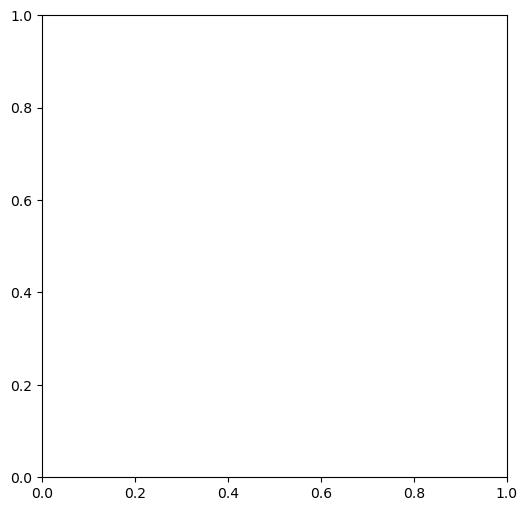

In [19]:
analyse=pymolpro.database.analyse([result['cc-pVTZ'] for result in results.values()],db)
analyse['reaction statistics']

analysis keys dict_keys(['results', 'reaction energies', 'reaction energy deviations', 'reaction statistics', 'molecule energies', 'molecule energy deviations', 'molecule statistics'])
analysis keys dict_keys(['results', 'reaction energies', 'reaction energy deviations', 'reaction statistics', 'molecule energies', 'molecule energy deviations', 'molecule statistics', 'molecule violin plot'])
analysis keys dict_keys(['results', 'reaction energies', 'reaction energy deviations', 'reaction statistics', 'molecule energies', 'molecule energy deviations', 'molecule statistics'])
analysis keys dict_keys(['results', 'reaction energies', 'reaction energy deviations', 'reaction statistics', 'molecule energies', 'molecule energy deviations', 'molecule statistics', 'molecule violin plot'])
analysis keys dict_keys(['results', 'reaction energies', 'reaction energy deviations', 'reaction statistics', 'molecule energies', 'molecule energy deviations', 'molecule statistics'])
analysis keys dict_keys(['r

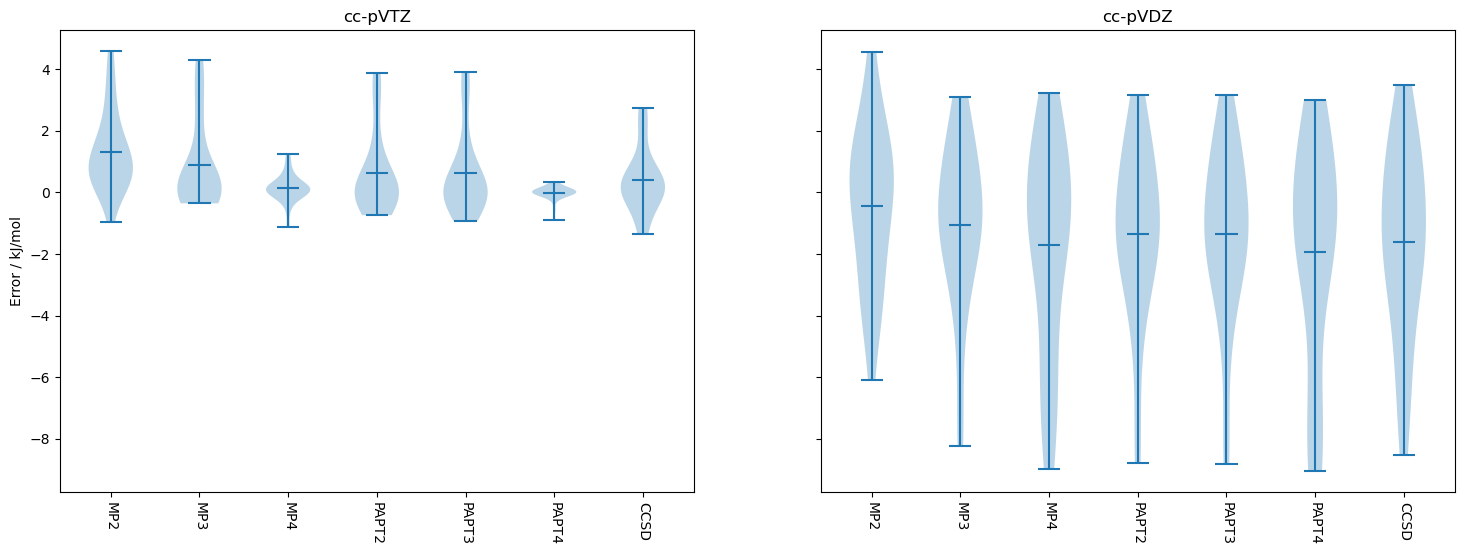

In [20]:
import matplotlib.pyplot as plt

methods_pruned = [method for method in methods if (method != 'HF') and (method != 'CCSD(T)')]
bases_pruned = ['cc-pVTZ', 'cc-pVDZ']
fig, panes = plt.subplots(nrows=1, ncols=len(bases_pruned), sharey=True, figsize=(18, 6))

for pane in range(len(bases_pruned)):
    data = []
    for method in methods_pruned:
        data.append(
            pymolpro.database.analyse(results[method][bases_pruned[pane]],
                                      results['CCSD(T)']['cc-pVTZ'],'kJ/mol')['reaction energy deviations'].to_numpy()[:, 0]
        )
    panes[pane].violinplot(data, showmeans=True, showextrema=True, vert=True, bw_method='silverman')
    panes[pane].set_xticks(range(1, len(methods_pruned) + 1), labels=methods_pruned, rotation=-90)
    panes[pane].set_title(bases_pruned[pane])
panes[0].set_ylabel('Error / kJ/mol')
plt.savefig(project_name + ".violin.pdf")